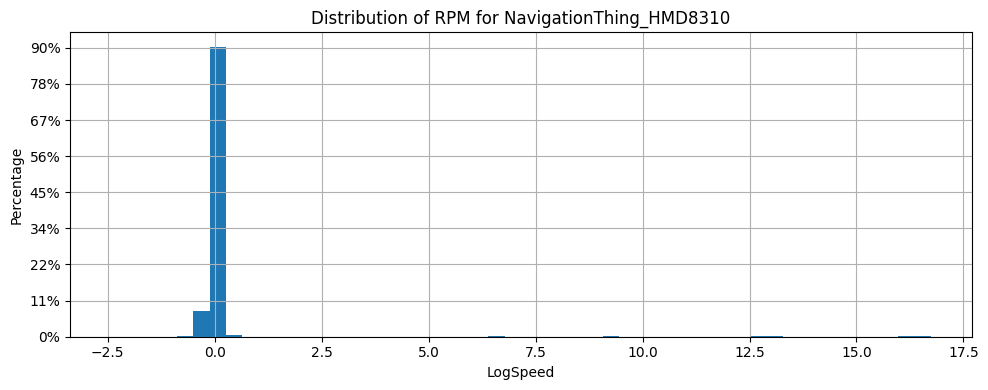

In [18]:
import pandas as pd
import seaborn as sns
from influxdb import InfluxDBClient
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Connect to InfluxDB
client = InfluxDBClient(host='localhost', port=8086)
client.switch_database('ISS')

# Define the measurement and time range
measurement = 'NavigationThing_HMD8310'
start_time = '2023-01-01T00:00:00Z'
end_time = '2023-02-01T00:00:00Z'

# Construct the queries
query = f'SELECT * FROM "{measurement}" WHERE time >= \'{start_time}\' AND time < \'{end_time}\''

# Execute the queries and convert the results to DataFrames
results1 = client.query(query)
df = pd.DataFrame.from_records(results1.get_points())

# Convert columns to numeric
df['LogSpeed'] = pd.to_numeric(df['LogSpeed'])

# Plot histograms
fig, ax1 = plt.subplots(1, figsize=(10, 4))
ax1.hist(df['LogSpeed'], bins=50)
ax1.set_title(f'Distribution of RPM for {measurement}')
ax1.set_xlabel('LogSpeed')
ax1.set_ylabel('Percentage')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(df)))

ax1.grid(True)

plt.tight_layout()
plt.show()

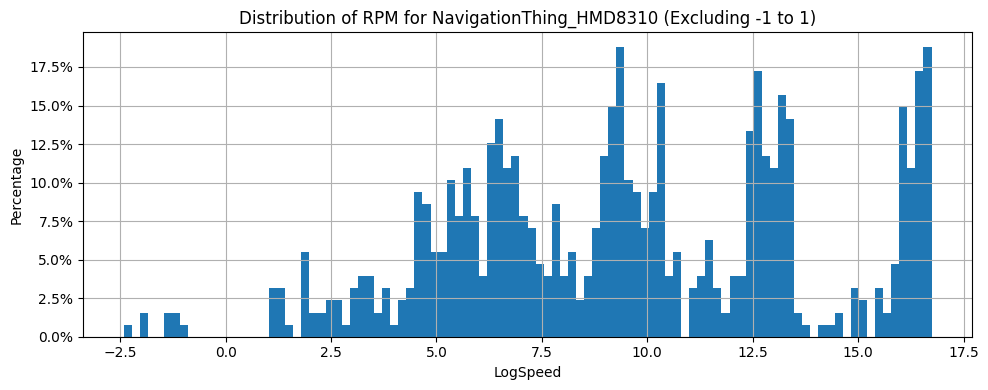

In [21]:
# Filter out values within the range of -1 to 1
filtered_df = df[(df['LogSpeed'] > 1) | (df['LogSpeed'] < -1)]

# Plot histogram with more vertical bars
fig, ax1 = plt.subplots(1, figsize=(10, 4))
hist, bins, _ = ax1.hist(filtered_df['LogSpeed'], bins=100, density=True)  # Increase the number of bins

ax1.set_title(f'Distribution of RPM for {measurement} (Excluding -1 to 1)')
ax1.set_xlabel('LogSpeed')
ax1.set_ylabel('Percentage')

# Convert y-axis values to percentage
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax1.grid(True)

plt.tight_layout()
plt.show()

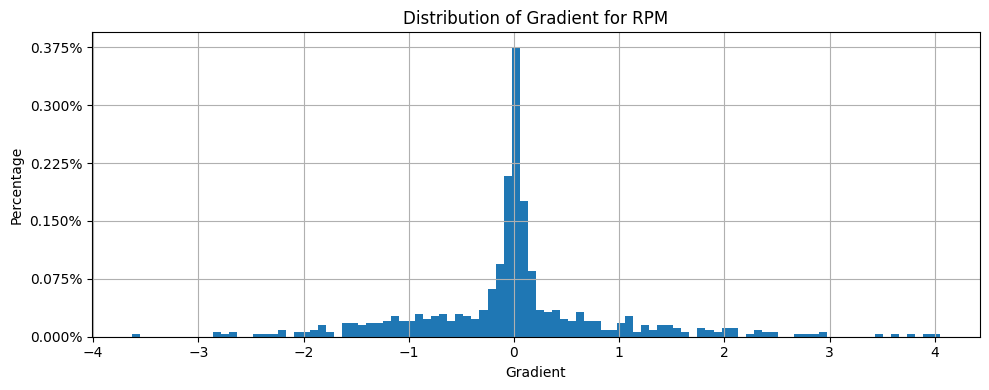

In [24]:
# Compute derivatives and remove zero values
deriv = np.gradient(filtered_df['LogSpeed'])


# Plot histograms for derivatives
fig, (ax_d) = plt.subplots(1, figsize=(10, 4))

ax_d.hist(deriv, bins=100, density=True)
ax_d.set_title(f'Distribution of Gradient for RPM')
ax_d.set_xlabel('Gradient')
ax_d.set_ylabel('Percentage')
ax_d.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(deriv)))


ax_d.grid(True)
ax_d.grid(True)

plt.tight_layout()
plt.show()
